In [1]:
# !pip install transformers

In [1]:
# from transformers import ViltProcessor, ViltForQuestionAnswering
# import requests
# from PIL import Image

# # prepare image + question
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# text = "How many cats are there?"

# processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
# model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# # prepare inputs
# encoding = processor(image, text, return_tensors="pt")

# # forward pass
# outputs = model(**encoding)
# logits = outputs.logits
# idx = logits.argmax(-1).item()
# print("Predicted answer:", model.config.id2label[idx])

In [3]:
import json

In [2]:
val_file_questions ='datasets/v2_OpenEnded_mscoco_val2014_questions.json'
val_file_answers = 'datasets/v2_mscoco_val2014_annotations.json'

In [4]:
with open(val_file_questions, 'r') as f:
    val_questions = json.load(f)['questions']
    f.close()

In [5]:
with open(val_file_answers, 'r') as f:
    val_annotations = json.load(f)['annotations']
    f.close()

In [16]:
test_size : int  = 1000
test_size = len(val_questions) 

In [17]:
test_size

214354

In [18]:
questions = []
answers = []
features_id = []

for i in range(test_size):
    questions.append(val_questions[i]['question'])
    answers.append(val_annotations[i]['multiple_choice_answer'])
    features_id.append(val_questions[i]["image_id"])

In [22]:
questions[:10]

['Where is he looking?',
 'What are the people in the background doing?',
 'What is he on top of?',
 'What website copyrighted the picture?',
 'Is this a creamy soup?',
 'Is this rice noodle soup?',
 'What is to the right of the soup?',
 'What is the man doing in the street?',
 "How many photo's can you see?",
 'What does the truck on the left sell?']

In [19]:
len(set(answers))

14008

In [23]:
answers[:10]

['down',
 'watching',
 'picnic table',
 'foodiebakercom',
 'no',
 'yes',
 'chopsticks',
 'walking',
 '1',
 'ice cream']

In [27]:
import os
import re
filenames = os.listdir('datasets/validation/val2014')

In [28]:
img_ids = []
for file in filenames:
    img_ids.append(int(re.search("[0-9][0-9][0-9][0-9][0-9]+", file).group()))

In [30]:
features_id[:10]

[262148,
 262148,
 262148,
 393225,
 393225,
 393225,
 393225,
 393226,
 393226,
 393226]

In [35]:
features_id.index(262148)

0

In [37]:
img_ids.index(262148)

39570

In [43]:
# now mapping with the image ids with answers , questions , filenames
# img_ids -> features_id
# features_id -> questions
# features_id -> answers
# features_id -> filenames
import pandas as pd

data = pd.DataFrame(
    data = img_ids,
    columns=['img_ids']
)

data["filenames"] = filenames


In [44]:
data.head()

,img_ids,filenames
0,524173,COCO_val2014_000000524173.jpg
1,347666,COCO_val2014_000000347666.jpg
2,382172,COCO_val2014_000000382172.jpg
3,157669,COCO_val2014_000000157669.jpg
4,412362,COCO_val2014_000000412362.jpg


In [45]:
# append question and answers according to image id

data["questions"] = data["img_ids"].apply(lambda x: questions[features_id.index(x)])
data["answers"] = data["img_ids"].apply(lambda x: answers[features_id.index(x)])

In [46]:
data.head()

,img_ids,filenames,questions,answers
0,524173,COCO_val2014_000000524173.jpg,Is the beach very sandy?,yes
1,347666,COCO_val2014_000000347666.jpg,Is there any water?,yes
2,382172,COCO_val2014_000000382172.jpg,How many buckles are on the front of the horse...,2
3,157669,COCO_val2014_000000157669.jpg,Is this a house or apartment?,house
4,412362,COCO_val2014_000000412362.jpg,Is the back chandelier off?,no


In [52]:
# add datasets/validation/val2014 to filenames

data["filenames"] = data["filenames"].apply(lambda x: 'datasets/validation/val2014/' + x)

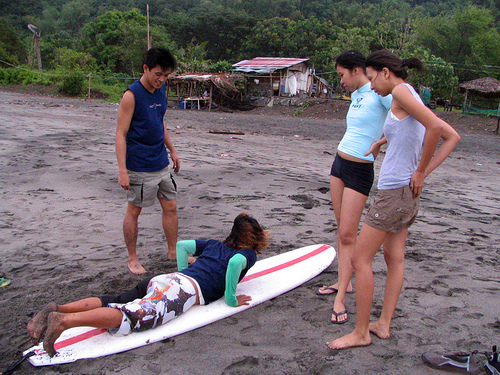

In [51]:
import PIL 

from PIL import Image

img = Image.open('datasets/validation/val2014/COCO_val2014_000000524173.jpg')
img

In [ ]:
# sample of a dataset [ image_path, question, answer]

In [54]:


from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
import requests

# Initialize processor and model
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# Function to load image
def load_image(image_path_or_url):
    if image_path_or_url.startswith('http://') or image_path_or_url.startswith('https://'):
        image = Image.open(requests.get(image_path_or_url, stream=True).raw)
    else:
        image = Image.open(image_path_or_url)
    return image

# Function to predict answer
def predict_answer(image, question):
    encoding = processor(image, question, return_tensors="pt")
    outputs = model(**encoding)
    logits = outputs.logits
    idx = logits.argmax(-1).item()
    return model.config.id2label[idx]



/home/diamo/VAQ/vaq/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-27 11:11:14.400973: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 11:11:14.442556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 11:11:14.442595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 11:11:14.44390

In [55]:
# convert data.sample(1000) values to [(filepath, question, answer)]

data = data.sample(1000)
dataset = []

for i in range(1000):
    dataset.append((data.iloc[i]["filenames"], data.iloc[i]["questions"], data.iloc[i]["answers"]))

In [57]:
dataset

[('datasets/validation/val2014/COCO_val2014_000000251232.jpg',
  'Is this train made of plastic?',
  'yes'),
 ('datasets/validation/val2014/COCO_val2014_000000313928.jpg',
  'How many tables are there?',
  '1'),
 ('datasets/validation/val2014/COCO_val2014_000000277208.jpg',
  'Is the animal asleep?',
  'no'),
 ('datasets/validation/val2014/COCO_val2014_000000273617.jpg',
  'Is it sunny?',
  'no'),
 ('datasets/validation/val2014/COCO_val2014_000000485710.jpg',
  'What will this man use to get back to the top of the mountain?',
  'ski lift'),
 ('datasets/validation/val2014/COCO_val2014_000000536110.jpg',
  'Are any beaks touching?',
  'no'),
 ('datasets/validation/val2014/COCO_val2014_000000157358.jpg',
  'Is this the usual sort of vehicle used in this public area?',
  'no'),
 ('datasets/validation/val2014/COCO_val2014_000000108253.jpg',
  'Are the customers eating inside or outside?',
  'inside'),
 ('datasets/validation/val2014/COCO_val2014_000000207003.jpg',
  'What movie is this fish 

In [58]:
# Your dataset with ground truth answers
# dataset = [
#     ("http://images.cocodataset.org/val2017/000000039769.jpg", "How many cats are there?", "2"),
#     # Add more (image_path_or_url, question, ground_truth) triples
# ]

# Evaluate model
correct_predictions = 0
total_predictions = len(dataset)

for image_path_or_url, question, ground_truth in dataset:
    try:
        image = load_image(image_path_or_url)
        predicted_answer = predict_answer(image, question)
        if predicted_answer.lower() == ground_truth.lower():  # Case-insensitive comparison
            correct_predictions += 1
    except Exception as e:
        continue

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")